<a href="https://colab.research.google.com/github/mathmeza/data_science/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando a Violência no Rio de Janeiro**

O Rio de Janeiro é um estado com **43.696 km² de extensão** e possui cerca de aproximadamente 16 milhões de pessoas (1 de jul. de 2014). 

É responsável pela segunda maior economia do Brasil e possui **12,6% do PIB** *(Produto Interno Bruto)* brasileiro.

Vale ressaltar que o estado do Rio de Janeiro é um dos **principais destinos de turismo para os estrangeiros**, se tornando uma espécie de "*vitrine*" para o mundo.

<center><img alt="Analisando Violência RJ" width="60%" src="https://www.melhoresdestinos.com.br/wp-content/uploads/2019/02/passagens-aereas-rio-de-janeiro-capa2019-03.jpg"></center>

É fato que infelizmente a violência atinge todas as cidades do Brasil e ganha destaque nos noticiários cada vez mais.

Nos dias de hoje, a conscientização dos órgãos públicos e as leis de acesso às informações, estão proporcionando gradativamente a disponibilização de várias fontes de dados.

Como exemplo, o governo do Rio de Janeiro traz a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/).

> **Neste projeto iremos analisar a violência contida neste estado.**



Fontes:
[Wikipédia](https://pt.wikipedia.org/wiki/Rio_de_Janeiro_(estado)), [todamateria.com.br](https://www.todamateria.com.br/estado-do-rio-de-janeiro/#:~:text=Rio%20de%20Janeiro-,Hist%C3%B3ria,batizado%20de%20Rio%20de%20Janeiro.&text=A%20regi%C3%A3o%20da%20ba%C3%ADa%20da,por%20uma%20expedi%C3%A7%C3%A3o%20de%20franceses.), [uol](https://vestibular.uol.com.br/resumo-das-disciplinas/atualidades/violencia-no-rio-de-janeiro-desafio-do-estado-e-vencer-o-trafico.htm)

## **Obtenção dos Dados**

Através do site [ISPDados.rj.gov](http://www.ispdados.rj.gov.br/estatistica.html) obteremos os dados, tendo em vista que há informações que nos ajudarão com a captura de insights.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

Aproveito também para compartilhar o site [ISPVisualizações](http://www.ispvisualizacao.rj.gov.br/index.html) onde possui dados correlacionais com a base e permite uma visão externa da análise que será feita.

- Tendo em vista que há uma base pré-processada provida pelo Carlos Melo da equipe [sigmoidal](https://sigmoidal.ai/), utilizaremos através do link [base pré-processada](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

### Importando os dados

In [ ]:
# Importar os pacotes necessários
import pandas as pd

# Importar o dataset
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados

Essa etapa tem como objetivo apresentar um entendimento dos dados que analisaremos e passar suas dimensões.


In [ ]:
# Tamanho do nosso dataset
print(f'Quantidade de entradas: {df.shape[0]}')
print(f'Quantidade de variáveis: {df.shape[1]}')

Quantidade de entradas: 344
Quantidade de variáveis: 56


Agora que sabemos as dimensões, vamos verificar quais são as variáveis existentes em nosso dataset.

In [ ]:
# Colunas do nosso dataset
print(df.columns)

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Sabendo quais são as dimensões e quais varíaveis estão disponíveis no dataset, analisaremos também quais são os tipos de dados contidos em cada varíavel.

Este ponto nos ajudará a direcionar o trabalho no processo de limpeza de dados.

In [ ]:
# Tipos de dados do nosso dataset
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Interessante ressaltar que as variáveis presentes no dataset são todas do tipo numérico, ou seja, intercalando entre `int` ou `float`.

Com todas essas informações já coletadas de nosso dataset, agora analisaremos como esses dados estão apresentados.

In [ ]:
# Mostrar as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Analisando as entradas é possível ver que logo de cara temos diversas varíaveis com dados ausentes.

Verificaremos a proporção deles em relação à totalidade do dataset.

In [ ]:
# % de valores ausentes do Dataset

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Podemos ver com os dados acima que as varíaveis com relação à bicicletas e crimes relacionados à drogas possuem quantidades consideráveis de valores nulos. 

Como temos dados com datas muito antigas, uma hipótese é que os crimes possivelmente não estavam sendo devidamente computados.

É possível realizarmos uma análise exploratória verificando como estavam sendo computados esses dados ao decorrer do tempo.

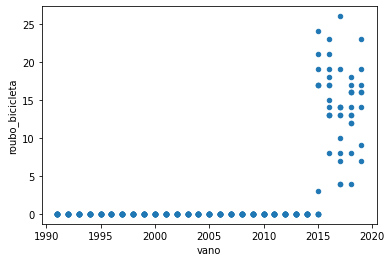

In [ ]:
df_eda = df.copy()

df_eda.vano = pd.to_datetime(df_eda.vano, format="%Y")
df_eda.vano = df_eda.vano.dt.year

df_eda.roubo_bicicleta = df_eda.roubo_bicicleta.fillna(0)

df_eda.plot(x='vano', y='roubo_bicicleta',kind='scatter');

Confirmando nossa hipótese, os dados referente à variável de roubos de bicicleta só foram implantados a partir do ano de 2015.

## Informações Estatísticas da Violência no Rio de Janeiro

Usando o método `describe()` podemos visualizar a distribuição estatística do dataframe.

Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

In [ ]:
# Apresentando dados estatísticos do dataset
df.describe().round(2)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.00,344.00,344.00,248.00,344.00,260.00,344.00,344.00,200.00,260.00,248.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,200.00,236.00,200.00,200.00,68.00,344.00,344.00,344.00,344.00,200.00,200.00,68.00,344.00,344.00,248.00,200.00,200.00,200.00,344.00,164.00,164.00,164.00,344.00,164.00,164.00,164.00,164.00,248.00,212.00,344.00,212.00,200.00,200.00,344.00,344.00,344.00,248.00,344.00
mean,2004.84,6.45,504.56,4.33,15.67,71.90,318.27,5492.80,369.94,212.12,3410.76,455.01,133.28,2448.70,340.32,3418.52,659.00,9.38,3.55,957.97,11.32,145.66,10.81,1211.22,9428.12,1674.67,1518.92,650.23,1449.18,124.81,5994.33,10433.18,0.67,133.26,7.76,2231.86,1071.93,609.24,759.15,186.15,1772.24,2319.59,568.63,1255.51,83.04,5530.33,435.13,66.26,3.30,2.08,0.34,577.69,4734.74,2448.70,53794.16,2.99
std,8.29,3.45,113.77,2.76,5.86,36.49,127.61,1514.22,94.39,54.23,776.16,119.77,44.32,789.69,223.86,2459.02,297.62,10.56,2.63,624.31,6.40,55.39,7.77,800.58,4578.01,294.85,971.85,268.84,368.64,80.25,1964.77,3696.73,0.96,43.30,5.09,772.09,643.38,246.31,312.87,36.22,656.76,650.52,248.04,357.04,62.95,1100.75,65.35,34.46,2.19,1.76,0.64,104.97,3204.05,789.69,11039.05,0.08
min,1991.00,1.00,272.00,0.00,2.00,10.00,122.00,2350.00,188.00,111.00,848.00,243.00,49.00,1097.00,59.00,688.00,281.00,0.00,0.00,0.00,1.00,11.00,0.00,81.00,3261.00,1159.00,322.00,23.00,484.00,0.00,2322.00,4691.00,0.00,23.00,0.00,717.00,80.00,248.00,262.00,114.00,729.00,1173.00,225.00,628.00,21.00,1409.00,236.00,0.00,0.00,0.00,0.00,334.00,1086.00,1097.00,30621.00,2.00
25%,1998.00,3.00,413.75,2.00,11.00,41.75,200.00,4067.00,282.00,176.00,3040.00,365.75,103.75,1889.75,208.25,1053.00,430.75,2.00,2.00,549.75,6.00,106.00,2.25,811.75,5107.75,1430.50,732.00,501.00,1297.00,3.75,3978.00,6700.25,0.00,109.75,4.75,1654.50,714.50,360.50,426.00,160.00,1276.75,1681.00,332.50,950.50,46.00,4868.50,390.00,42.00,2.00,1.00,0.00,500.00,1557.00,1889.75,45374.50,3.00
50%,2005.00,6.00,507.00,4.00,15.00,70.00,318.50,5830.50,384.00,203.00,3372.00,433.50,125.00,2322.00,285.50,2788.50,592.00,4.50,3.00,717.50,10.00,149.50,13.00,1154.00,9243.50,1637.50,1076.50,717.50,1492.50,158.00,6559.00,10448.50,0.00,132.50,7.00,2170.50,979.50,623.00,815.00,184.00,1755.00,2424.00,530.00,1259.00,58.00,5455.00,427.00,60.50,3.00,2.00,0.00,590.00,4190.00,2322.00,54926.50,3.00
75%,2012.00,9.00,577.25,6.00,19.00,96.25,398.25,6582.50,441.25,236.25,3733.50,536.25,151.25,2778.00,401.25,5385.25,784.00,14.00,5.00,1306.75,15.00,180.50,17.00,1635.00,11590.50,1833.25,2334.25,860.00,1731.25,181.50,7601.50,13877.50,1.00,152.25,11.00,2880.50,1546.00,763.50,1045.25,208.00,2202.00,2905.50,793.50,1515.25,93.00,6261.75,481.50,87.00,4.00,3.00,1.00,649.00,6872.75,2778.00,63292.50,3.00
max,2019.00,12.00,831.00,21.00,36.00,194.00,645.00,9050.00,561.00,449.00,6653.00,914.00,300.00,5358.00,1329.00,9669.00,1628.00,54.00,12.00,2626.00,37.00,283.00,26.00,3661.00,23203.00,2630.00,5368.00,1036.00,2215.00,243.00,9880.00,18003.00,5.00,271.00,31.00,3627.00,2543.00,1160.00,1282.00,289.00,3695.00,3425.00,1114.00,2314.00,350.00,9034.00,628.00,217.00,13.00,10.00,3.00,848.00,13833.00,5358.00,75403.00,3.00


### Crimes Contra o Patrimônio - Veículos

Vamos dedicar essa seção do projeto para investigar dados em relação aos crimes de roubo e furto de veículos.

Problema comum nas grandes metrópoles brasileiras, esse tipo de crime merece destaque em nosso projeto. Como temos dados sobre roubo, furto e recuperação de veículos, conseguimos utilizar essas informações para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

In [ ]:
# Médias das variáveis roubo_veiculo, furto_veiculos, recuperacao_veiculos
print("Média da varíavel roubo_veículo:\t{}".format(round(df.roubo_veiculo.mean(),2)))
print("Média da varíavel furto_veiculos:\t{}".format(round(df.furto_veiculos.mean(),2)))
print("Média da varíavel recuperacao_veiculos:\t{}".format(round(df.recuperacao_veiculos.mean(),2)))

Média da varíavel roubo_veículo:	2448.7
Média da varíavel furto_veiculos:	1674.67
Média da varíavel recuperacao_veiculos:	1772.24


In [ ]:
# Calcular a (%) de carros recuperados em relação aos carros roubados + carros furtados
porc = round((df.recuperacao_veiculos.sum() / (df.roubo_veiculo.sum() + df.furto_veiculos.sum()))*100,2)
print("A porcentagem de casos recuperados em relação aos carros roubados + carros furtados é de: {}%".format(porc))

A porcentagem de casos recuperados em relação aos carros roubados + carros furtados é de: 42.98%


### Crimes Contra a Vida

Abaixo, vamos identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` ao longo do período observado no dataset.

In [ ]:
# Encontrar os valores máximos e mínimos da váriavel hom_doloso.
print("O valor máximo da varíável hom_doloso é: {}".format(df.hom_doloso.max()))
print("O valor mínimo da varíável hom_doloso é: {}".format(df.hom_doloso.min()))

O valor máximo da varíável hom_doloso é: 831
O valor mínimo da varíável hom_doloso é: 272


## Visualização de Dados

Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

Abaixo, faremos essa análise em relação à variável `hom_doloso`.


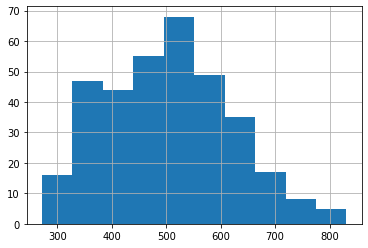

In [ ]:
# Histograma da varíavel hom_doloso
df.hom_doloso.hist();

No gráfico acima, alguns dados chamam a nossa atenção, como:

* Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo.
* Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.

Por último, vamos analisar a variável `roubo_em_coletivo` utilizando um gráfico de linha.

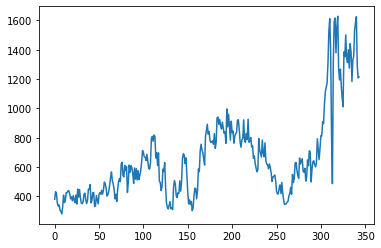

In [ ]:
# Gráfico de linha para a variável roubo_em_coletivo
df.roubo_em_coletivo.plot();

## Conclusão

A principal lição aprendida aqui foi a necessidade de se atentar a cada detalhe do seu *dataset* quando se está lidando com dados reais, extraídos diretamente de sites e portais com dados abertos.

Muitas vezes, nos acostumamos a usar dados de competições ou cursos, que estão perfeitos.